In [1]:
%matplotlib inline
import simplyP as sp

In [4]:
# Path to the Excel file containing parameters for setup and all the model parameters
params_fpath = (r'C:\Data\GitHub\SimplyP\Development\v0-2\Parameters_working.xlsx')

# Plotting options: either 'paper' or 'notebook'
fig_display_type = 'notebook'

In [5]:
# Read inputs
p_SU, dynamic_options, p, p_LU, p_SC, met_df, obs_dict = sp.read_input_data(params_fpath)

In [6]:
%%time
# Run model
df_TC_dict, df_R_dict, Kf, ode_output_dict = sp.run_simply_p(met_df, p_SU, p_LU,
                                                             p_SC, p, dynamic_options, 
                                                             p_SU.inc_snowmelt)

Kf (the soil P sorption coefficient; mm/kg): 5.4160512063023145e-06
Wall time: 15.5 s


### 4. Explore model output

The following code cells summarise the model output, saving results to csv or as graphs.

#### 4.1. Results from snow module

thde snow module is only relevant if it was called during the model run (i.e. `inc_snowmelt=='y'` in the setup Excel file).

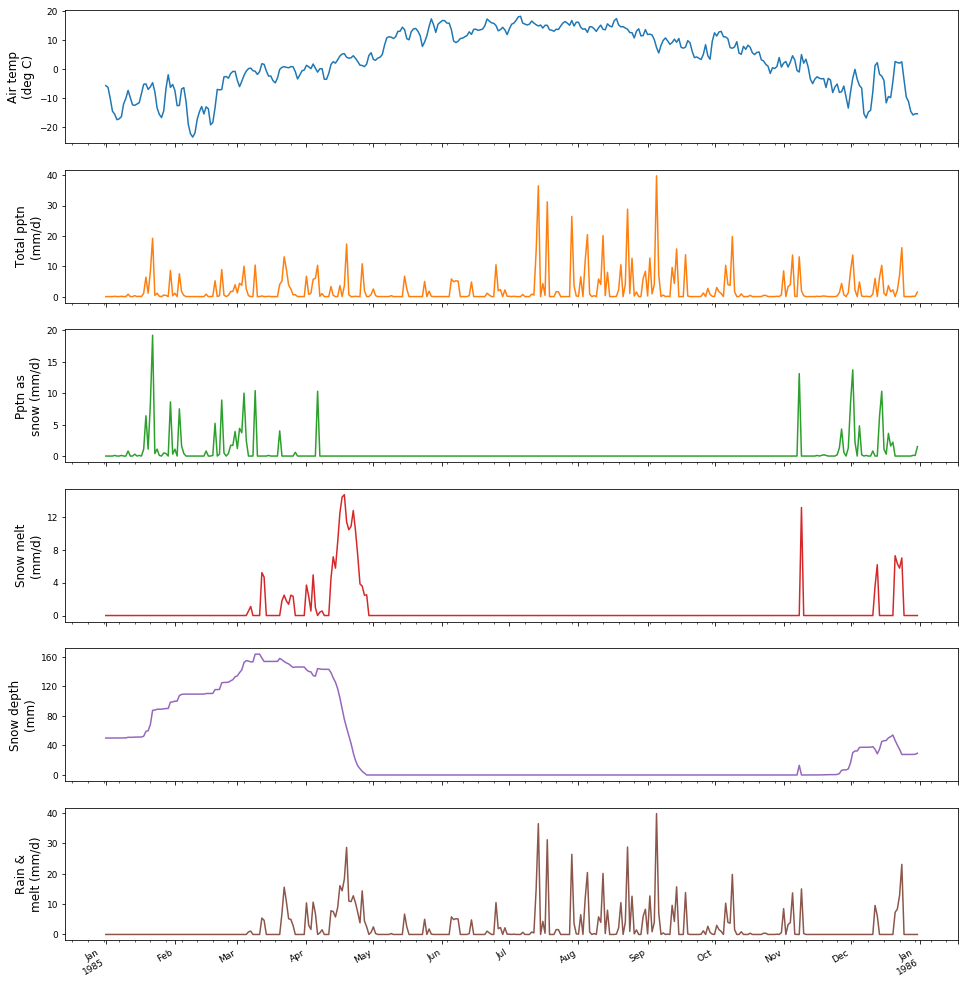

In [7]:
# Plot snowfall/melt
sp.plot_snow(met_df, p_SU, fig_display_type)

#### 4.2. Results from terrestrial processing

In [8]:
# Plot terrestrial
# sp.plot_terrestrial(p_SU, p_SC, p, df_TC_dict, met_df, fig_display_type)

#### 4.3. Instream results

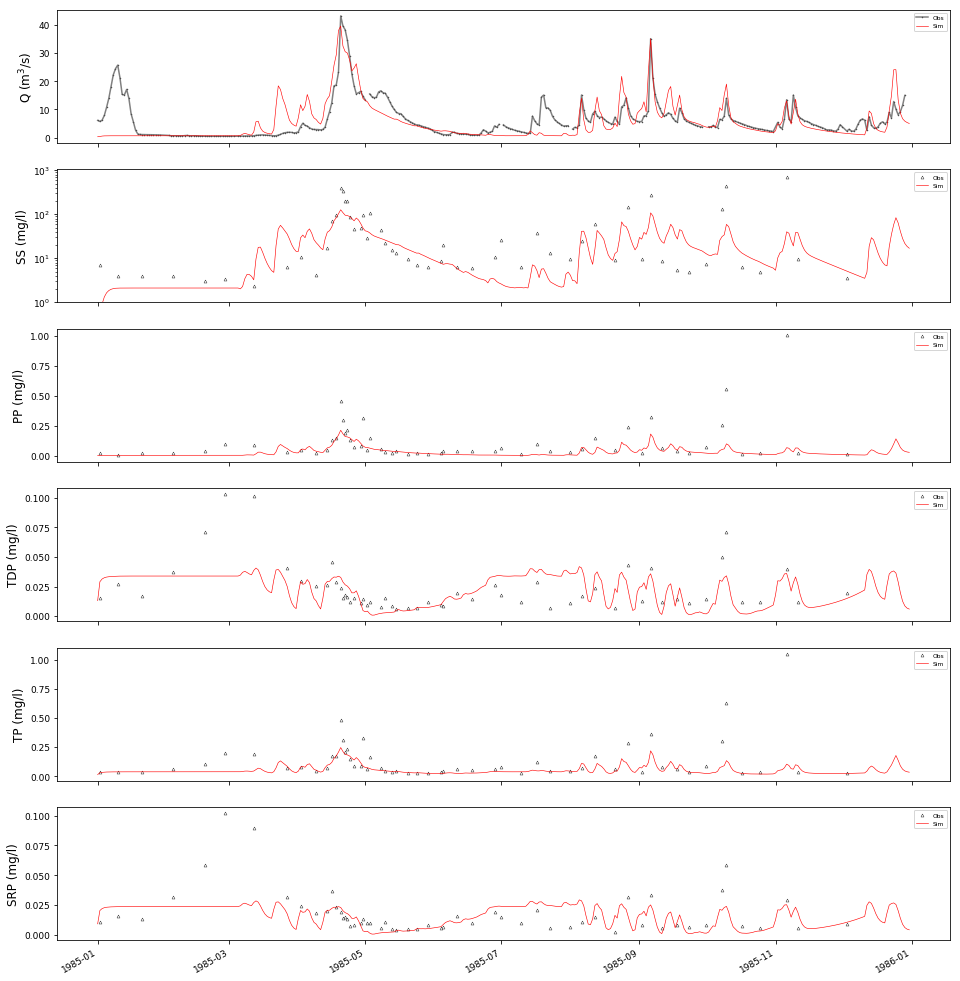

In [9]:
# Plot in-stream
# N.B. if you selected a log scale, you may get a warning if any of the simulated values are close to 0.
sp.plot_in_stream(p_SU, obs_dict, df_R_dict, fig_display_type)

#### 4.4. Calculate goodness-of-fit statistics

Statistics only calculated for reaches and parameters which have more than 10 observations.

In [45]:
# GoF summary
gof_stats = sp.goodness_of_fit_stats(p_SU, df_R_dict, obs_dict)
gof_stats

,N obs,NSE,log NSE,Spearmans r,r$^2$,Bias (%),nRMSD (%),Reach
Q,351,0.440332,0.056804,0.603580,0.509941,-9.177583,45.542196,1
SS,57,0.259316,0.118789,0.725449,0.277191,-6.260168,39.284331,1
TDP,57,-0.070727,-0.435167,0.593822,0.255760,29.266746,78.267297,1
PP,57,-0.044511,-1.537962,0.605759,0.166348,-1.857964,54.126946,1
TP,57,0.008569,0.348715,0.682552,0.172320,3.665628,52.823465,1
SRP,57,0.148075,-0.189988,0.576072,0.238508,17.833627,65.795046,1
